In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
#sns.set(font_scale=1.5)

from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn import decomposition

from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_mutual_info_score, adjusted_rand_score, homogeneity_score,v_measure_score, completeness_score

In [2]:
# Random seed for duplication of the code
np.random.seed(0)

## Visualizaing Dataset 

In [3]:
def visualize(x, y, title, axes=None):
    
    if len(x[0] > 2):
        pca = decomposition.PCA(n_components=2)
        pca.fit(x)
        x = pca.transform(x)
    
    x0 = [i[0] for i in x]    
    x1 = [i[1] for i in x]
    
    df = pd.DataFrame.from_dict({'x1' : x0, 'x2': x1,
                                'label' : y})
    df["label"] = df["label"].astype(str)
    
    p = sns.scatterplot(ax = axes, data=df, x='x1', y = 'x2', hue='label', legend=None)
    if axes is not None:
        axes.set_title(title)
        if len(set(y)) > 5:
            plt.legend([],[], frameon=False)
    else:
        sns.scatterplot(data=df, x='x1', y = 'x2', hue='label', legend=None)

        plt.show()

    return

In [4]:
def print_metric(x, y, target):
    def get_accuracy(y, target):
        mapping = {}
        
        result = pd.DataFrame.from_dict({'Cluster' : y, 'species' : target})
        
        min_range = -1 if -1 in y else 0
        max_range = None

        max_range = min_range + 2 if len(set(y)) > 2 else min_range + len(set(y))

        range_val = range(min_range, max_range)
        
        for cluster_num in range_val:
            OneCluster = pd.DataFrame(result[result['Cluster'] == cluster_num].groupby('species').size())
            OneCluster.columns=['Size']
            NewDigit = OneCluster.index[OneCluster['Size'] == OneCluster['Size'].max()].tolist()
            NewDigit[0]
            
            rowIndex = result.index[result['Cluster'] == cluster_num]
            result.loc[rowIndex, 'TransLabel'] = NewDigit[0]
        
        Correct = (result['species'] == result['TransLabel']).sum()
        Accuracy = round(Correct/df.shape[0],3)
        print('\t Accuracy : ', Accuracy)
        
    
    try:
        get_accuracy(y, target)
        print('\t Silhouette Score : ', silhouette_score(x, y))
        print('\t David Boulden Score : ', davies_bouldin_score(x, y))
        print('\t Calinski Harabasz Score : ', calinski_harabasz_score(x, y))
        print('\t Homogenity Score : ', homogeneity_score(target, y))
        print('\t Completeness Score', completeness_score(target, y))
        print('\t V Measure Score', v_measure_score(target, y))
        print('\t Adjusted Random Score', adjusted_rand_score(target, y))
        print('\t Adjusted Mutual Info Score', adjusted_mutual_info_score(target, y))
        
    except Exception as e:
        print('\t',e)

In [62]:
def plot_elbow(dataset, min_sample=3):
    neighbors = NearestNeighbors(n_neighbors=20)
    neighbors_fit = neighbors.fit(dataset)
    distances, indices = neighbors_fit.kneighbors(dataset)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)
    plt.xlabel('Data points')
    plt.ylabel('Epsilon')
    plt.show()

In [6]:
df = pd.read_csv('./Data/Spiral.csv')

In [7]:
col_input = ['x1', 'x2']
x = df[col_input].values
y = df['label'].values

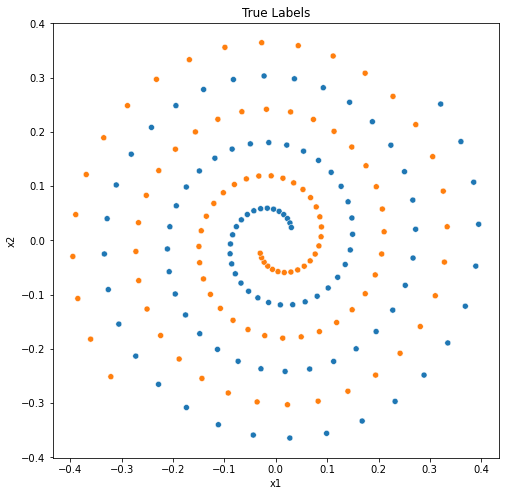

In [8]:
fig, axes = plt.subplots(1, 1, figsize=(8, 8))
visualize(x, y, 'True Labels', axes)

## DBSCAN

### Changing the epsilon value

[0] eps : 0.01 Number of clusters :  3
	 Accuracy :  0.5
	 Silhouette Score :  -0.35848797352377987
	 David Boulden Score :  5.629672783464071
	 Calinski Harabasz Score :  0.08405295022982479
	 Homogenity Score :  0.030927835051547697
	 Completeness Score 0.13449714530737655
	 V Measure Score 0.05029114122843152
	 Adjusted Random Score 0.00033061494379545955
	 Adjusted Mutual Info Score 0.03517910575111436
[1] eps : 0.05 Number of clusters :  3
	 Accuracy :  0.5
	 Silhouette Score :  -0.0871079894657833
	 David Boulden Score :  19.895450981275033
	 Calinski Harabasz Score :  0.5311873056850045
	 Homogenity Score :  0.5876288659793822
	 Completeness Score 0.37539591651625365
	 V Measure Score 0.45812627198248995
	 Adjusted Random Score 0.3408177568020723
	 Adjusted Mutual Info Score 0.4549320415547978
[2] eps : 0.1 Number of clusters :  1
	 Accuracy :  0.5
	 Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
[3] eps : 0.5 Number of clusters :  1
	 Accuracy :  0.5
	 N

<Figure size 432x288 with 0 Axes>

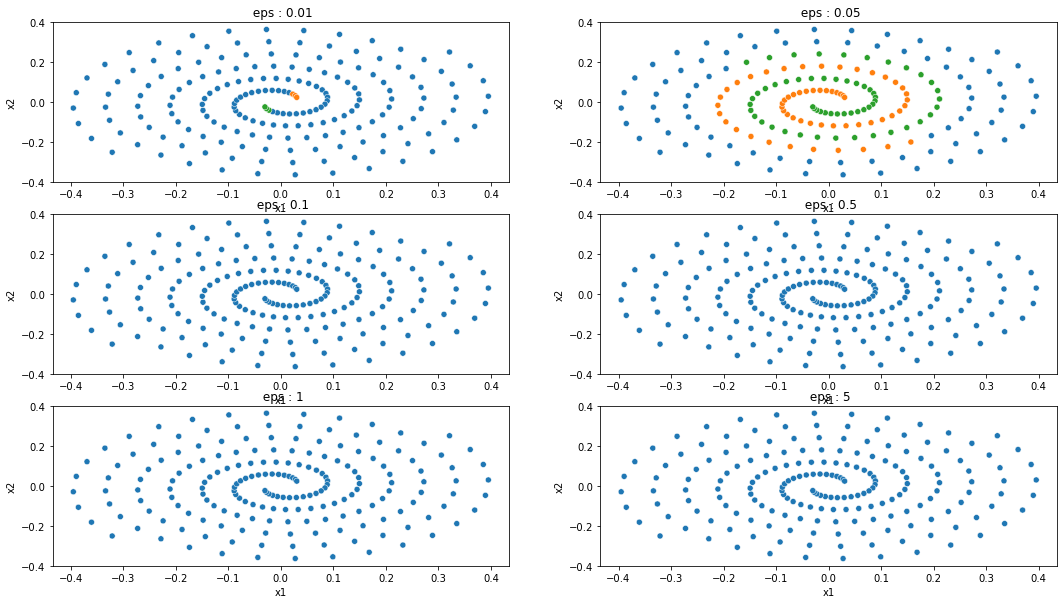

In [9]:
eps_space = [0.01, 0.05, 0.1, 0.5, 1, 5]

plt.figure(1)
fig, axes = plt.subplots(3, 2, figsize=(18, 10))

for i in range(len(eps_space)):
    eps = eps_space[i]
    
    clustering = DBSCAN(eps=eps, min_samples=2).fit(x)

    print(f'[{i}] eps : {eps} Number of clusters : ', len(set(clustering.labels_)))
    print_metric(x, clustering.labels_, y)
    
    visualize(x, clustering.labels_, f" eps : {eps}", axes[i//2, i%2])
plt.show()

#### Changing the minimum sample

[0] min sample : 1 Number of clusters :  82
	 Accuracy :  0.01
	 Silhouette Score :  -0.19699301882051448
	 David Boulden Score :  0.6036296856346832
	 Calinski Harabasz Score :  4.442240780078885
	 Homogenity Score :  1.0000000000000009
	 Completeness Score 0.23967375812546807
	 V Measure Score 0.3866723104438105
	 Adjusted Random Score 0.343948704960209
	 Adjusted Mutual Info Score 0.2685360339317254
[1] min sample : 2 Number of clusters :  3
	 Accuracy :  0.5
	 Silhouette Score :  -0.0871079894657833
	 David Boulden Score :  19.895450981275033
	 Calinski Harabasz Score :  0.5311873056850045
	 Homogenity Score :  0.5876288659793822
	 Completeness Score 0.37539591651625365
	 V Measure Score 0.45812627198248995
	 Adjusted Random Score 0.3408177568020723
	 Adjusted Mutual Info Score 0.4549320415547978
[2] min sample : 3 Number of clusters :  3
	 Accuracy :  0.5
	 Silhouette Score :  -0.0871079894657833
	 David Boulden Score :  19.895450981275033
	 Calinski Harabasz Score :  0.5311873056

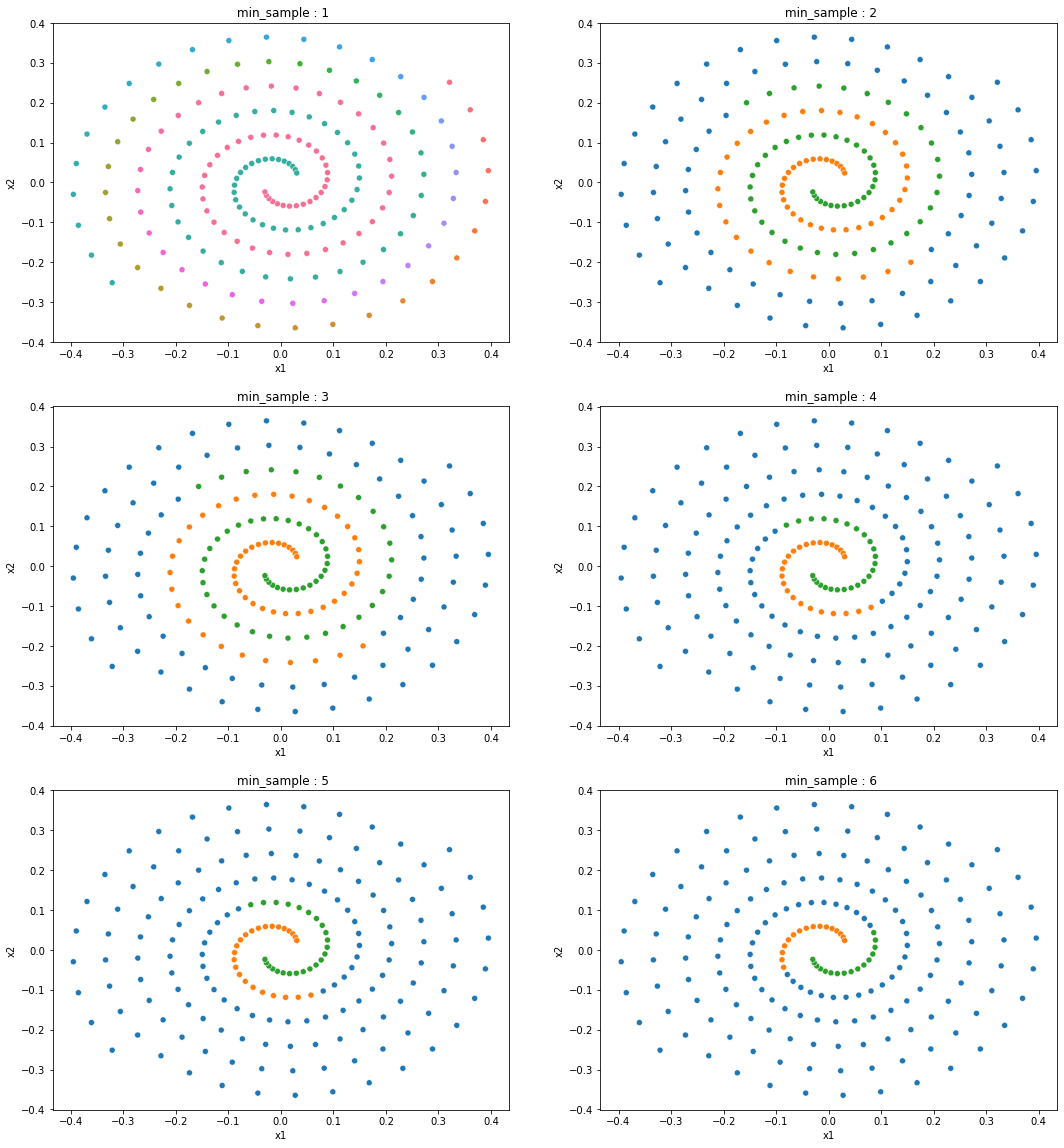

In [10]:
min_sample_space = [1,2,3,4,5,6]
eps = 0.05
fig, axes = plt.subplots(3, 2, figsize=(18, 20)) 
for i in range(len(min_sample_space)):
    min_sample = min_sample_space[i]    
    
    clustering = DBSCAN(eps=eps, min_samples=min_sample).fit(x)

    print(f'[{i}] min sample : {min_sample} Number of clusters : ', len(set(clustering.labels_)))
    print_metric(x, clustering.labels_, y)
    visualize(x, clustering.labels_, f" min_sample : {min_sample}", axes[i//2, i%2])
plt.show()

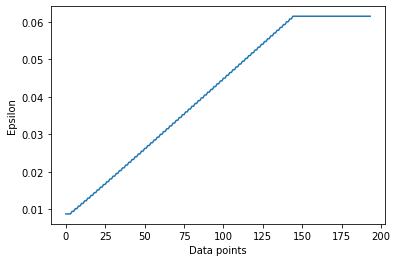

In [63]:
plot_elbow(x, min_sample=3)

	 Accuracy :  0.5
	 Silhouette Score :  -0.060068065341718935
	 David Boulden Score :  26.475296520662813
	 Calinski Harabasz Score :  0.43740124050154056
	 Homogenity Score :  0.711340206185568
	 Completeness Score 0.4506934201711075
	 V Measure Score 0.5517849796415277
	 Adjusted Random Score 0.5025839392097804
	 Adjusted Mutual Info Score 0.5491567267026255
[5] min sample : 2 Number of clusters :  3


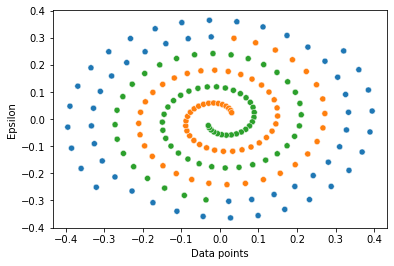

In [64]:
clustering = DBSCAN(eps=0.058650442, min_samples=3).fit(x)
print_metric(x, clustering.labels_, y)
print(f'[{i}] min sample : {min_sample} Number of clusters : ', len(set(clustering.labels_)))
visualize(x, clustering.labels_, f" min_sample : {min_sample}")

## Changing the metric

[0] metric : cityblock Number of clusters :  7
	 Accuracy :  0.278
	 Silhouette Score :  -0.358591574607479
	 David Boulden Score :  9.431191046018998
	 Calinski Harabasz Score :  1.5867573986350583
	 Homogenity Score :  0.4639175257731957
	 Completeness Score 0.25606330250688963
	 V Measure Score 0.3299872693112803
	 Adjusted Random Score 0.15097117516629713
	 Adjusted Mutual Info Score 0.3171131494480858
[1] metric : cosine Number of clusters :  1
	 Accuracy :  0.5
	 Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
[2] metric : euclidean Number of clusters :  3
	 Accuracy :  0.5
	 Silhouette Score :  -0.0871079894657833
	 David Boulden Score :  19.895450981275033
	 Calinski Harabasz Score :  0.5311873056850045
	 Homogenity Score :  0.5876288659793822
	 Completeness Score 0.37539591651625365
	 V Measure Score 0.45812627198248995
	 Adjusted Random Score 0.3408177568020723
	 Adjusted Mutual Info Score 0.4549320415547978
[3] metric : l1 Number of clusters :  7
	 Acc

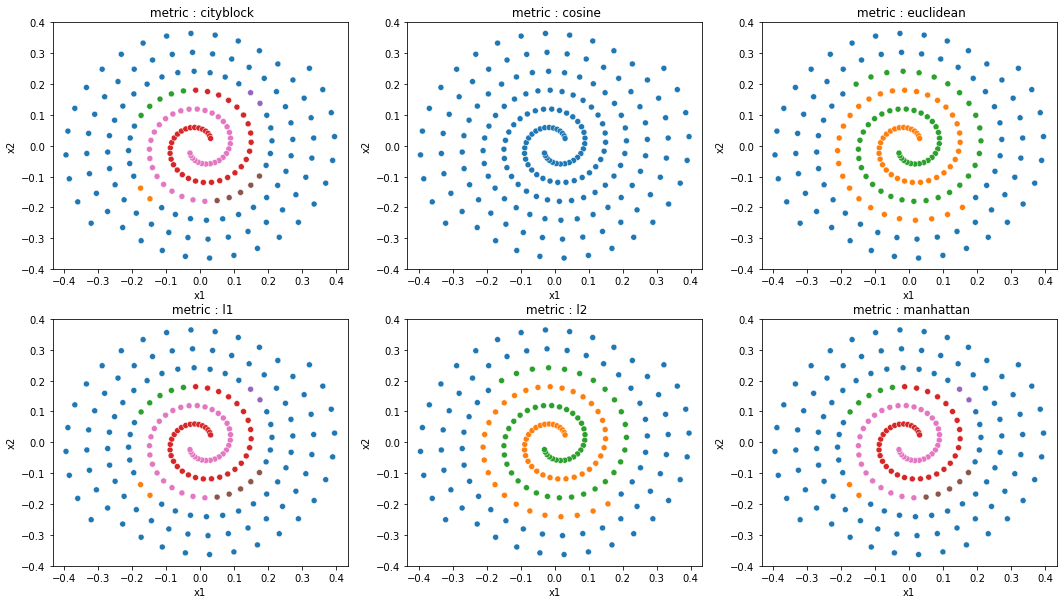

In [13]:
metric_space = ['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan']

eps = 0.05
min_sample = 2

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i in range(len(metric_space)):
    metric = metric_space[i]    
    
    clustering = DBSCAN(eps=eps, min_samples=min_sample, metric = metric).fit(x)

    print(f'[{i}] metric : {metric} Number of clusters : ', len(set(clustering.labels_)))
    print_metric(x, clustering.labels_, y)
    visualize(x, clustering.labels_, f" metric : {metric}", axes[i//3, i%3])
plt.show()